In [2]:
import open3d as o3d
import numpy as np
import os
import glob
import pandas as pd
import pymeshlab as pml
import time
import matplotlib as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
from stats import getstatistics_o3d, getstatistics_pml

In [5]:
original_dbpath = "../database"
database_stats_pkl = "dataframe.pkl"
if not os.path.exists(database_stats_pkl):
    df = getstatistics_o3d(original_dbpath,pkl_path=database_stats_pkl)
else:
    df = pd.read_pickle(database_stats_pkl)


Min, Max and average Number of triangles and Vertices over the entire dataset

In [6]:
"Min. Vertices:", df["Vertices"].min(), "Max. Vertices:", df["Vertices"].max(), "Avg. Vertices", df["Vertices"].mean()

('Min. Vertices:',
 16,
 'Max. Vertices:',
 73440,
 'Avg. Vertices',
 5025.5453080950465)

In [7]:
df[df["Vertices"].between(5000, 5050)]

,Class,Filename,Vertices,Triangles,Filepath
125,Biplane,D00246.obj,5022,9353,../database\Biplane\D00246.obj
429,Cellphone,D00817.obj,5016,9766,../database\Cellphone\D00817.obj
529,Computer,D01067.obj,5026,9528,../database\Computer\D01067.obj
555,Computer,m1778.obj,5026,9528,../database\Computer\m1778.obj
737,Fish,D00748.obj,5046,8098,../database\Fish\D00748.obj
2292,Train,D01064.obj,5037,29523,../database\Train\D01064.obj


### Average shape:

In [8]:
from viz import viz_mesh, compare_mesh
avgshape = "../database\Computer\D01067.obj"
# viz_mesh(avgshape)

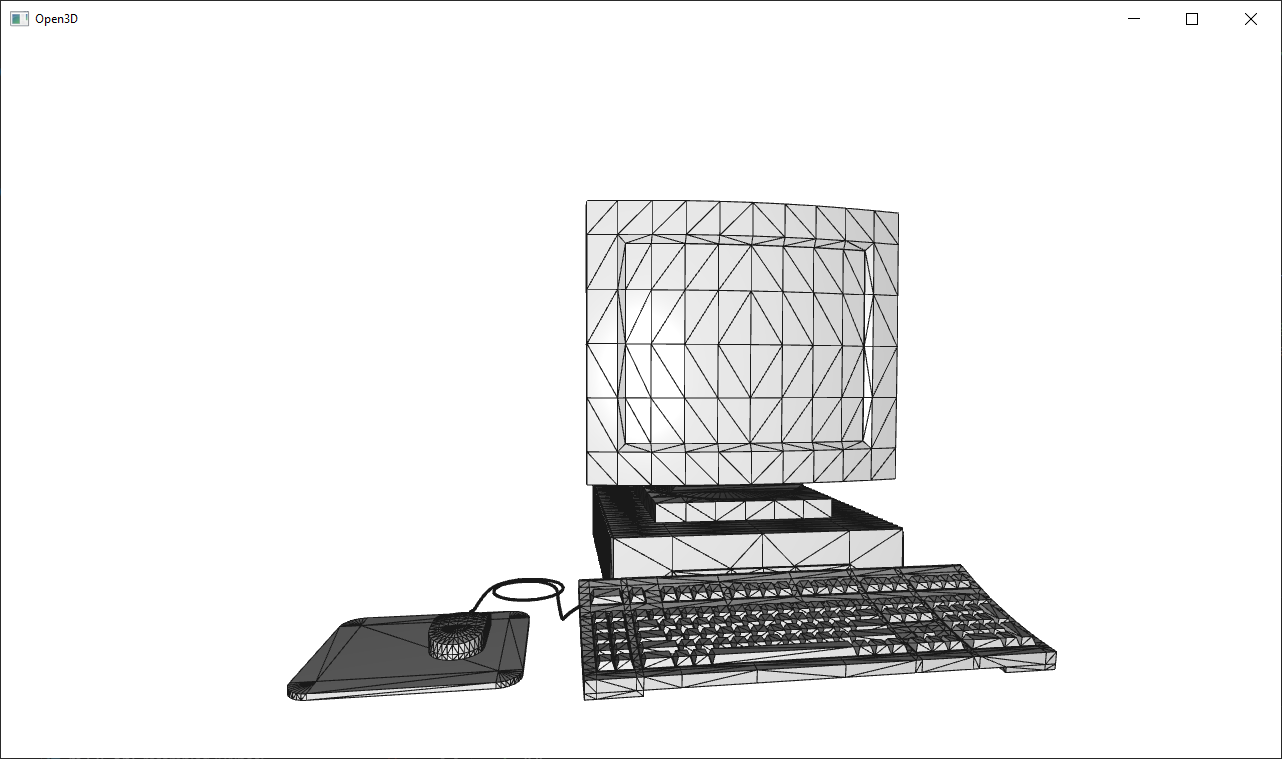


### Bounding box

In [9]:
from viz import show_aabb
# show_aabb(avgshape)

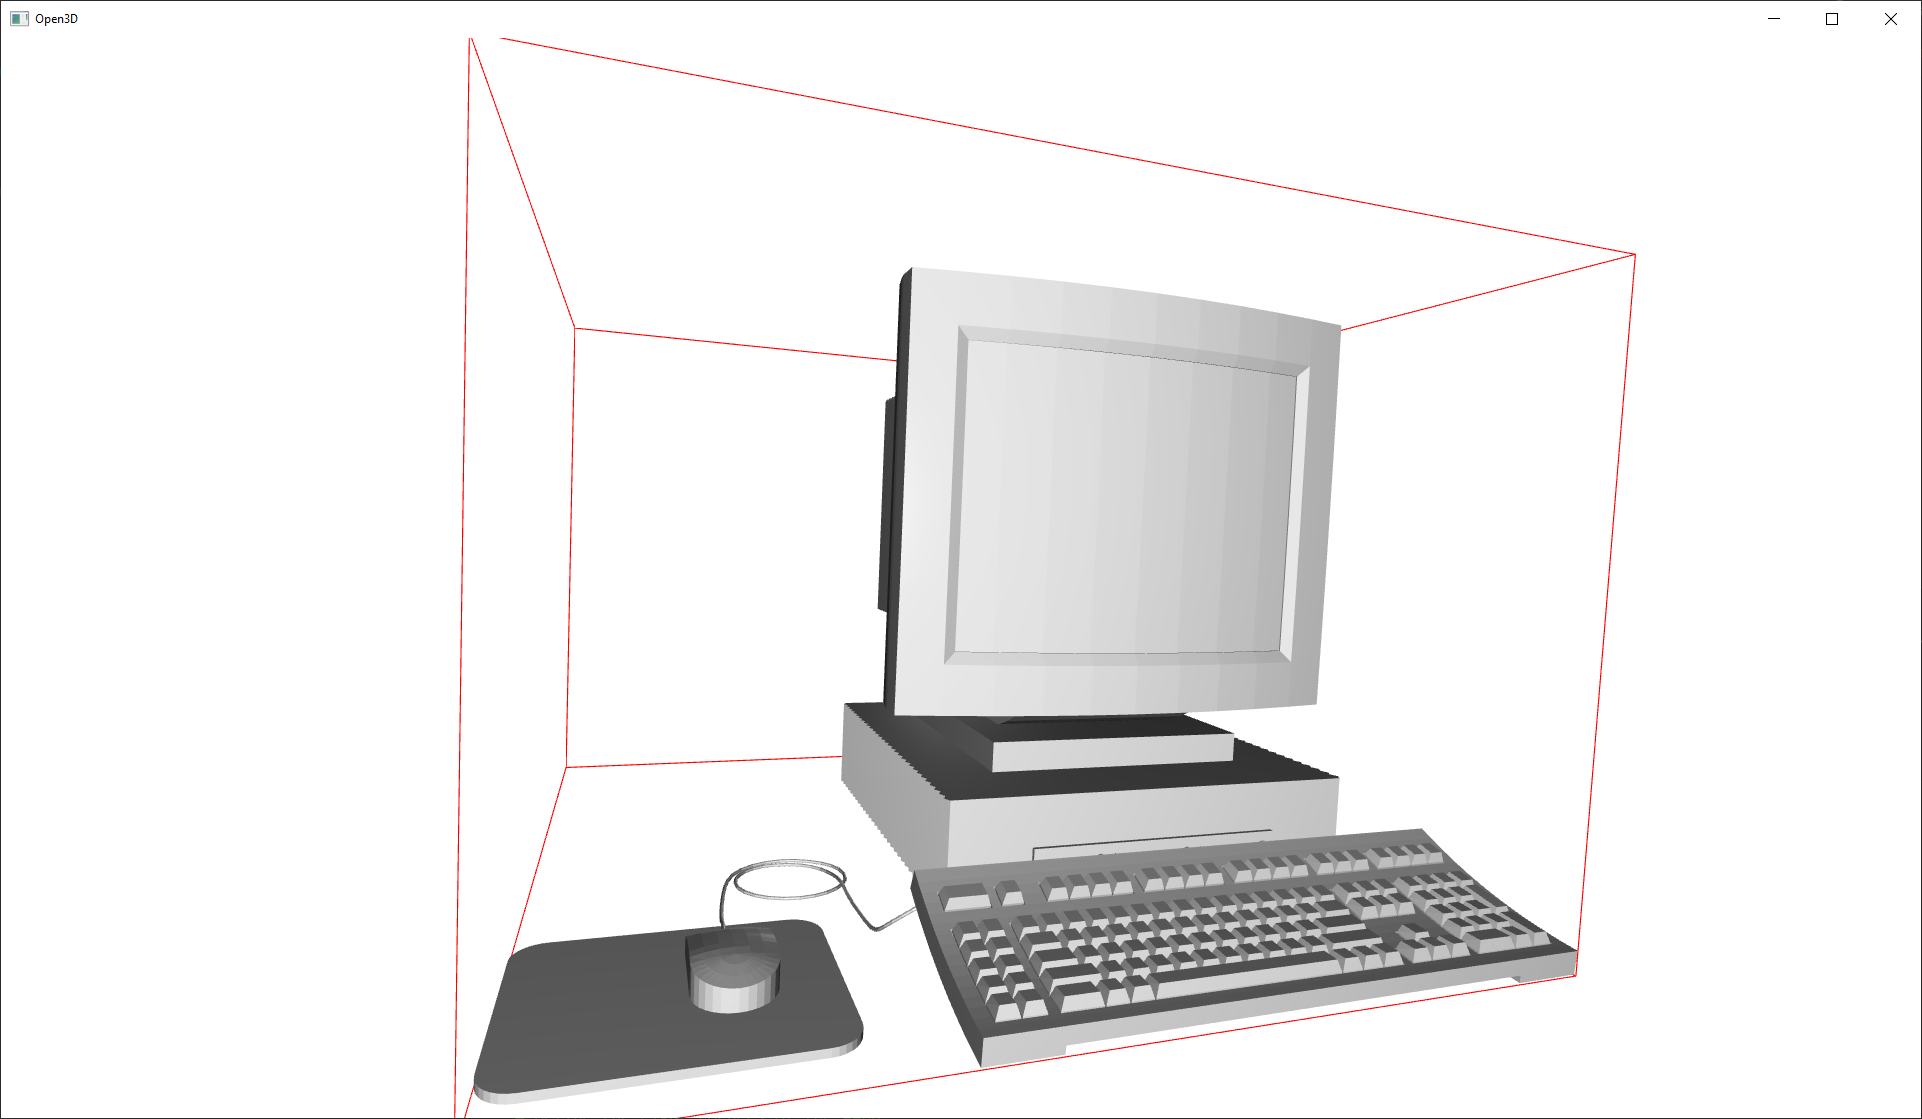

### Statistics

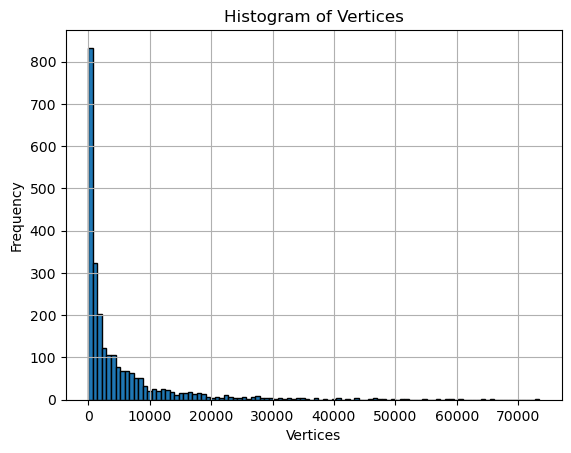

In [10]:
import matplotlib.pyplot  as plt
# Create a histogram
plt.hist(df['Vertices'], bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Vertices')
plt.ylabel('Frequency')
plt.title('Histogram of Vertices')
plt.grid(True)

# Display the histogram
plt.show()

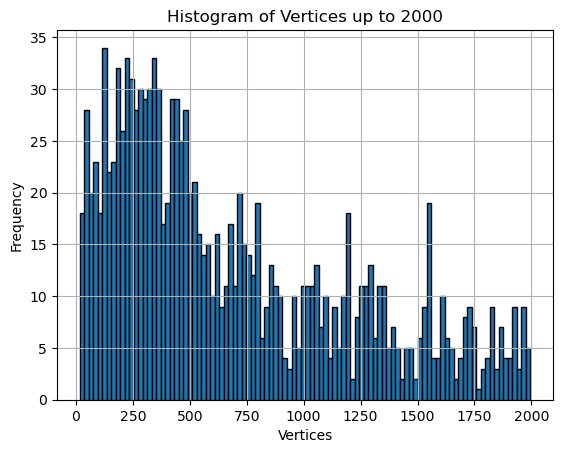

In [11]:
plt.hist(df[df['Vertices'] < 2000]['Vertices'], bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Vertices')
plt.ylabel('Frequency')
plt.title('Histogram of Vertices up to 2000')
plt.grid(True)

# Display the histogram
plt.show()

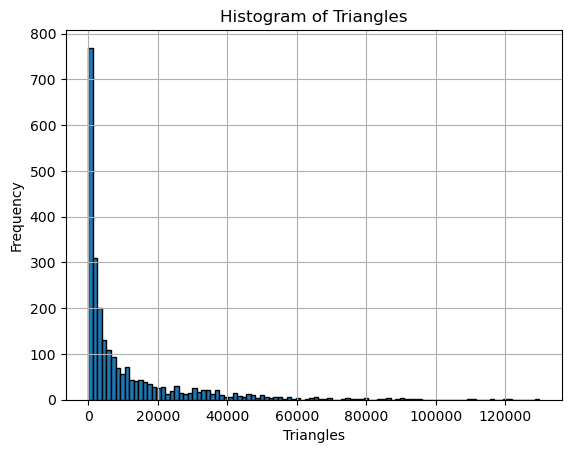

In [12]:
# Create a histogram
plt.hist(df["Triangles"], bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Triangles')
plt.ylabel('Frequency')
plt.title('Histogram of Triangles')
plt.grid(True)

# Display the histogram
plt.show()

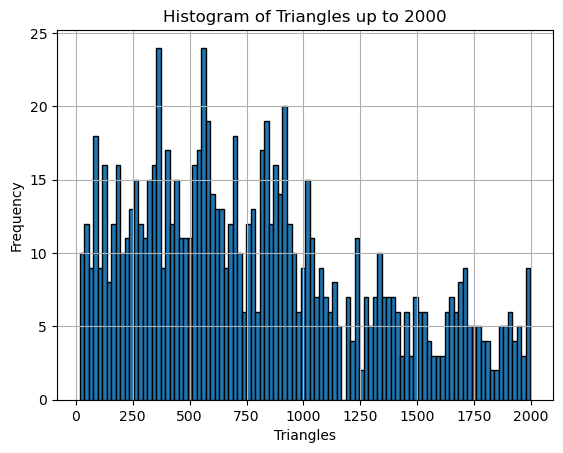

In [13]:
import matplotlib.pyplot  as plt
# Create a histogram
plt.hist(df[df['Triangles'] < 2000]["Triangles"], bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Triangles')
plt.ylabel('Frequency')
plt.title('Histogram of Triangles up to 2000')
plt.grid(True)

# Display the histogram
plt.show()

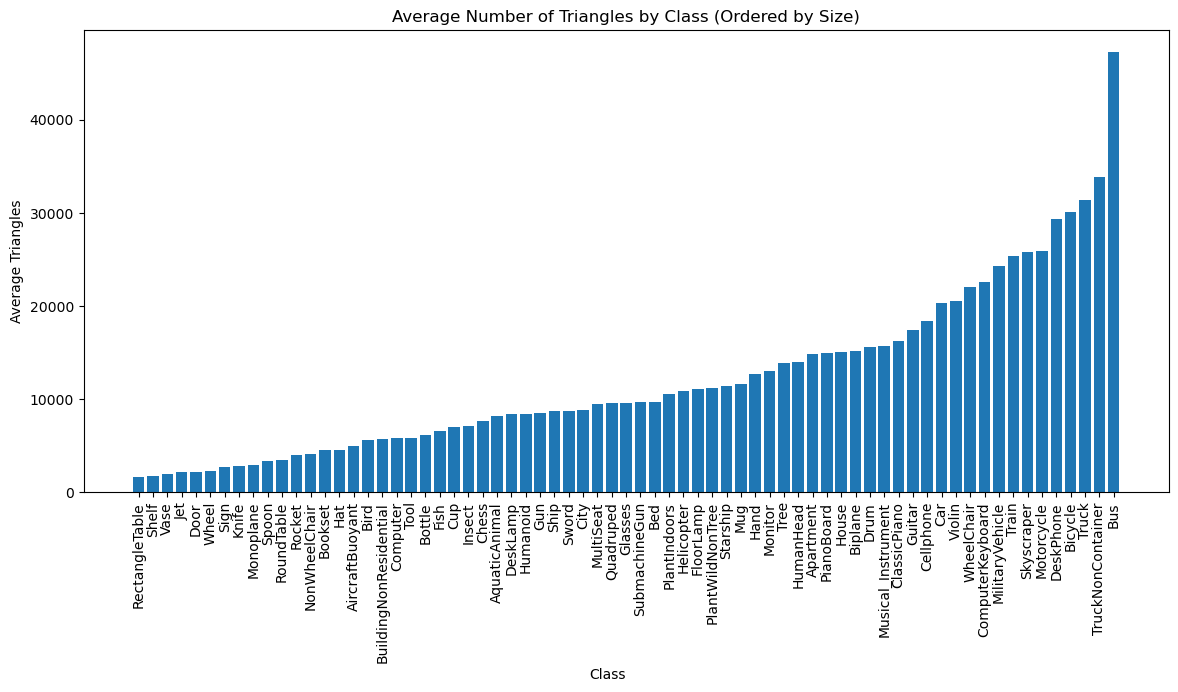

In [14]:
average_triangles = df.groupby('Class')['Triangles'].mean().reset_index()

# Sort the DataFrame by average Triangles in descending order
average_triangles = average_triangles.sort_values(by='Triangles', ascending=True)


# Create a bar chart with angled x-axis labels
plt.figure(figsize=(14, 6))
plt.bar(average_triangles['Class'], average_triangles['Triangles'])
plt.xlabel('Class', ha='right')  # Angle the x-axis labels
plt.xticks(rotation=90)
plt.ylabel('Average Triangles')
plt.title('Average Number of Triangles by Class (Ordered by Size)')
plt.show()

### Outliers

In [15]:
highVertexDf = df[df['Vertices'] > 50000]
highVertexDf

,Class,Filename,Vertices,Triangles,Filepath
100,Bicycle,D00462.obj,56754,111471,../database\Bicycle\D00462.obj
143,Biplane,m1120.obj,65722,129881,../database\Biplane\m1120.obj
366,Car,m1510.obj,54710,109357,../database\Car\m1510.obj
396,Car,m1544.obj,60326,116378,../database\Car\m1544.obj
457,Chess,m1595.obj,60667,121343,../database\Chess\m1595.obj
944,Helicopter,m1308.obj,58392,116773,../database\Helicopter\m1308.obj
1705,PlantIndoors,D00080.obj,64126,34887,../database\PlantIndoors\D00080.obj
1791,PlantWildNonTree,m985.obj,50833,88945,../database\PlantWildNonTree\m985.obj
2095,Skyscraper,D00058.obj,73440,53448,../database\Skyscraper\D00058.obj
2103,Skyscraper,D00520.obj,51626,52041,../database\Skyscraper\D00520.obj


In [16]:
lowVertexDf = df[df['Vertices'] < 40]
lowVertexDf

,Class,Filename,Vertices,Triangles,Filepath
270,BuildingNonResidential,m392.obj,33,80,../database\BuildingNonResidential\m392.obj
531,Computer,D01071.obj,29,43,../database\Computer\D01071.obj
538,Computer,D01102.obj,28,30,../database\Computer\D01102.obj
544,Computer,m1765.obj,28,30,../database\Computer\m1765.obj
545,Computer,m1766.obj,29,43,../database\Computer\m1766.obj
665,Door,D01121.obj,16,16,../database\Door\D01121.obj
668,Door,D01139.obj,31,29,../database\Door\D01139.obj
676,Door,D01194.obj,18,18,../database\Door\D01194.obj
678,Door,m1708.obj,16,16,../database\Door\m1708.obj
703,Drum,D00115.obj,36,204,../database\Drum\D00115.obj


In [17]:
# viz_mesh(lowVertexDf.iloc()[11]["Filepath"])

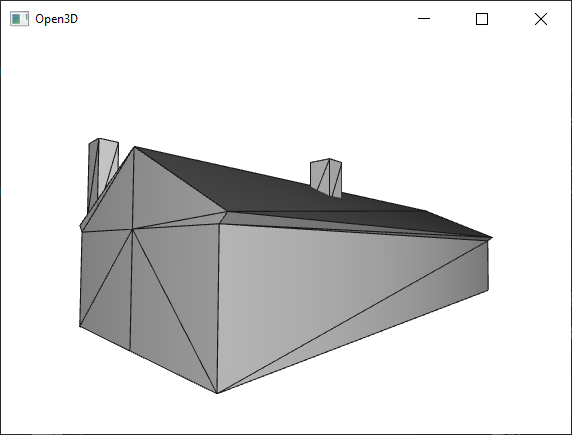

In [1]:
# viz_mesh(highVertexDf.iloc()[1]["Filepath"])

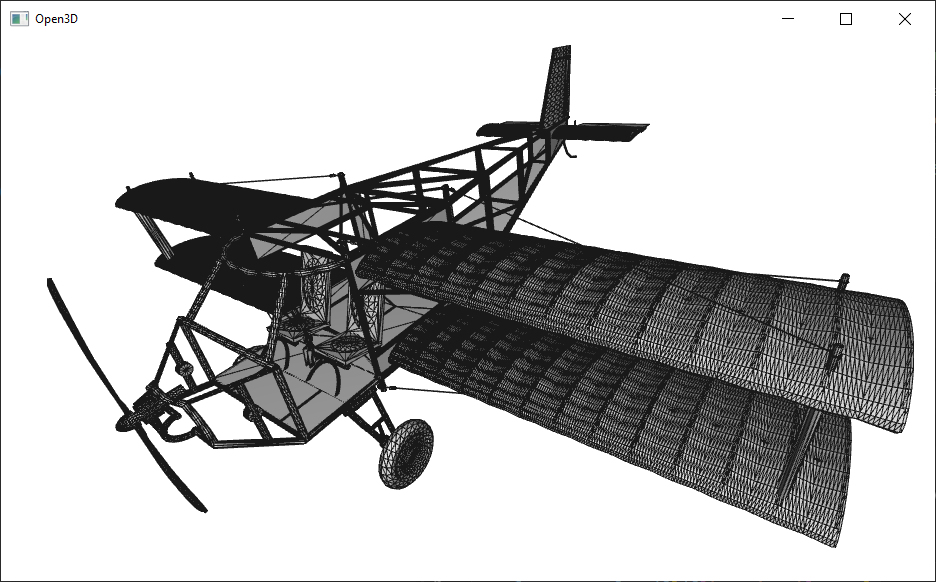

### Resampling outliers

In [20]:
from resampling import run_resampling_o3d, run_resampling_pml

Uncomment if you want to run the resampling

In [ ]:
# run_resampling_pml(dbpath=r"./database/", target_vertices=7000, factor=0.1, newfolderpath = "./resampledpml_new")

In [ ]:
# run_resampling_o3d(dbpath=r"./database/", target_vertices=7000, factor=0.1, newfolderpath = "./resampledo3d_new")

### Statistics after resampling

In [21]:
resampled_dbpath = "../resampledO3D/"
resampled_database_stats_pkl = "dataframe_resampled_o3d.pkl"
if not os.path.exists(resampled_database_stats_pkl):
    df2 = getstatistics_o3d(resampled_dbpath,pkl_path=resampled_database_stats_pkl)
else:
    df2 = pd.read_pickle(resampled_database_stats_pkl)


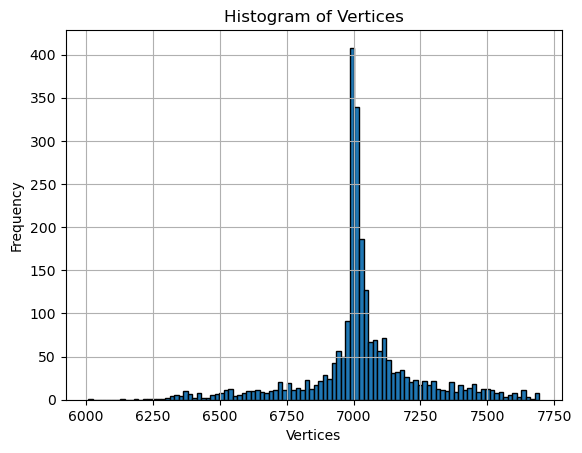

In [22]:
# Create a histogram
plt.hist(df2['Vertices'], bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Vertices')
plt.ylabel('Frequency')
plt.title('Histogram of Vertices')
plt.grid(True)

# Display the histogram
plt.show()

In [23]:
"Min. Vertices:", df2["Vertices"].min(), "Max. Vertices:", df2["Vertices"].max(), "Avg. Vertices", df2["Vertices"].mean()

('Min. Vertices:',
 6010,
 'Max. Vertices:',
 7694,
 'Avg. Vertices',
 7027.107128473621)